<a href="https://colab.research.google.com/github/joaofrantunes/btproxy/blob/master/projecto_de_AI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install TensorFlow (if necessary):

In [21]:
!pip install tensorflow

1-Load and Preprocess Data

In [22]:
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

2-Visualize Data

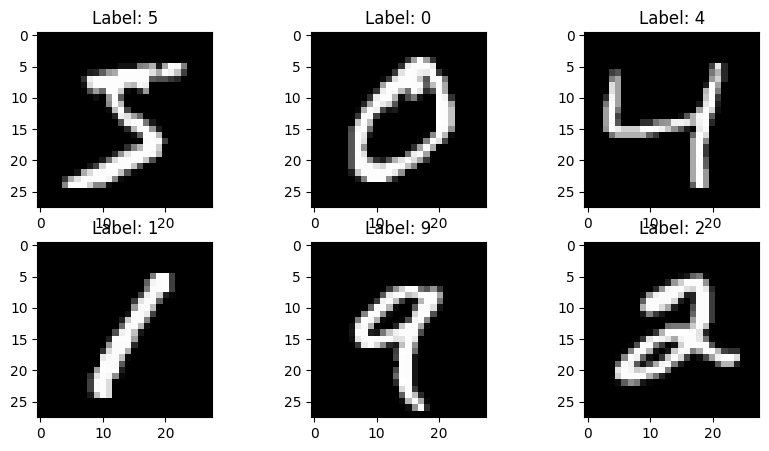

In [23]:
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Label: {y_train[i]}')
plt.show()

Model Architecture: Simple feedforward neural network with two layers.

The warning you're seeing is because Keras now prefers that you explicitly define the input shape using an Input layer, instead of passing the input_shape argument directly to layers like Flatten.

In [24]:
model = keras.Sequential([
    layers.Input(shape=(28, 28)),  # Define input shape here
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [14]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8786 - loss: 0.4329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9645 - loss: 0.1208
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9772 - loss: 0.0769
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9823 - loss: 0.0581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9864 - loss: 0.0429


Evaluate the Model

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0832
Test accuracy: 0.9766


Transfer Learning: Use pre-trained models like MobileNetV2 for image classification.

In [16]:
base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model Saving: Save and load models for future use.

In [20]:
# model.save('my_model.h5')  # Save the model
model.save('my_model.keras')  # Native Keras format
loaded_model = keras.models.load_model('my_model.keras')  # Load the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0832
Test accuracy: 0.9766
